## Ordinary Differential Equations (ODEs)

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

### Notations

Before we start, let's define some useful notations. The class of problems we try to solve using Simwork is a subet of the ODEs family called Initial Value Problems (IVPs). They have the following form:

\begin{equation}
\dot y = f(y,t), \quad y(t_0) = y_0,
\end{equation}

where $y, y_0 \in \mathbb R^n$. Here $n$ corresponds to the **dimension** of the problem or, in other words, the number of unknowns. In our world, $n$ usually corresponds to the number of entities (or `BioReac` in Simwork).
$n$ can range from 1 to 500+ for very complex models. As a rule of thumb, the higher the $n$, the more difficult it is to solve the problem, but we'll come back to that later.

### Numerical Methods

Among the vast collection of methods used to solve IVPs problems, we shall focus here on the implicit Backward Differentiation Formula (BDF) family because it's one of the methods (and actually almost the only one) we use in practice. It has proved to be very robust and efficient when solving large and _stiff_ problems.

### The fixed-order BDF scheme

To solve (1), the following discretization is proposed, where $t_n$ is the $n$-th discrete time point:

\begin{align}
y(t_n) &\simeq y^n, \\
f(y(t_n), t_n) &\simeq \beta f(y^n, t_n), \\
\dot y(t_n) &\simeq \frac{1}{h} \sum_{i=0}^{p} \alpha_i y(t^{n-i}),
\end{align}

where $p$ is the **order** of the method. The $p$-th order BDF scheme is usually referred to as BDF-p.
In practice, only the methods from BDF-1 (a.k.a _implicit Euler_) to BDF-6 (BDF-6 is so unstable that the library we're using stops at BDF-5) are used, the higher order methods being too unstable.
The higher the order, the more accurate the method is.  
Indeed, it can be shown that the truncation error for the $p$-order method is $\mathcal O (h^p)$, meaning bigger time steps can be taken to reach a given accuracy.  
Unfortunately, higher order also means more instability such that starting for $p = 3, 4, 5$ the methods are usually unusable in practice _as is_. That's where adaptive order BDF come into action.

### Adaptive order BDF

In practice we use all BDFs (BDF1 -> BDF5) at once ! This hybrid scheme is called adaptive order because it automatically adapts the order of the method during the time integration based on the current stability and the desired accuracy.

In [2]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np


In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
# Create the time grid.
T = 100.0  # length of the time-interval
dt = 0.02  # time-step size
N = int(T / dt) + 1  # number of time steps
t = np.linspace(0.0, T, num=N)  # time grid

In [5]:
# Set the initial conditions.
z0 = 100.0  # altitude
b0 = 10.0  # upward velocity resulting from gust
zt = 100.0  # trim altitude
g = 9.81  # acceleration due to gravity

# Set the initial value of the numerical solution.
u = np.array([z0, b0])

# Create an array to store the elevation value at each time step.
z = np.zeros(N)
z[0] = z0

# Temporal integration using Euler's method.
for n in range(1, N):
    rhs = np.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

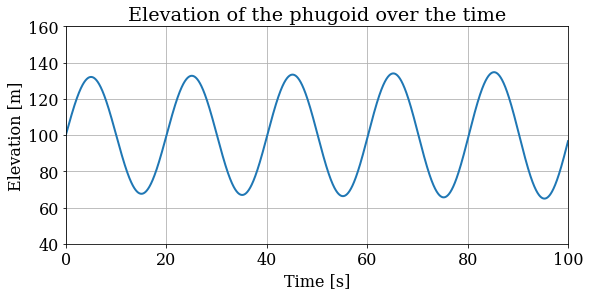

In [6]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

# Plot the solution of the elevation.
pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
pyplot.title('Elevation of the phugoid over the time')  # set the title
pyplot.xlabel('Time [s]')  # set the x-axis label
pyplot.ylabel('Elevation [m]')  # set the y-axis label
pyplot.xlim(t[0], t[-1])  # set the x-axis limits
pyplot.ylim(40.0, 160.0)  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(t, z, color='C0', linestyle='-', linewidth=2);

In [7]:
def change_line_width(lwdth):
    # Plot the solution of the elevation.
    pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
    pyplot.title('Elevation of the phugoid over the time')  # set the title
    pyplot.xlabel('Time [s]')  # set the x-axis label
    pyplot.ylabel('Elevation [m]')  # set the y-axis label
    pyplot.xlim(t[0], t[-1])  # set the x-axis limits
    pyplot.ylim(40.0, 160.0)  # set the y-axis limits
    pyplot.grid()  # set a background grid to improve readability
    pyplot.plot(t, z, color='C0', linestyle='-', linewidth=lwdth);

In [8]:
w = interactive(change_line_width, lwdth=(1.0,5.0))

In [9]:
display(w)

interactive(children=(FloatSlider(value=3.0, description='lwdth', max=5.0, min=1.0), Output()), _dom_classes=(…

In [10]:

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Material used to write this notebook

Süli, Mayers, An Introduction to Numerical Analysis, Cambridge University Press, 2003.